In [2]:
import sys
sys.path.insert(0,'..')

import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
from DL_project_utils import *

import dlc_practical_prologue as prologue


class Net1(nn.Module):
    def __init__(self, nb_hidden = 64):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1)
        self.fc1 = nn.Linear(128, nb_hidden)
        self.fc2 = nn.Linear(nb_hidden, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), kernel_size=2, stride=2)
        x = F.max_pool2d(F.relu(self.conv2(x)), kernel_size=2, stride=2)
        x = F.relu(self.fc1(x.view(-1, 128)))
        x = self.fc2(x)
        return x

class Net2(nn.Module):
    def __init__(self, nb_hidden = 256):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2)
        self.fc1 = nn.Linear(1024, nb_hidden)
        self.fc2 = nn.Linear(nb_hidden, 10)

    def forward(self, x):
#         x = F.relu(F.max_pool2d(self.conv1(x), kernel_size=2, stride=2))
#         x = F.relu(F.max_pool2d(self.conv2(x), kernel_size=2, stride=2))
        x = F.max_pool2d(F.relu(self.conv1(x)), kernel_size=2, stride=2)
        x = F.max_pool2d(F.relu(self.conv2(x)), kernel_size=2, stride=2, padding=1)
        x = F.relu(self.fc1(x.view(-1, 1024)))
        x = self.fc2(x)
        return x
    
class Net3(nn.Module):
    def __init__(self, nb_hidden = 64):
        super().__init__()
        self.conv1 = nn.Conv2d(2, 32, kernel_size=3, stride=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1)
        self.fc1 = nn.Linear(256, nb_hidden)
        self.fc2 = nn.Linear(nb_hidden, 2)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), kernel_size=2, stride=2)
        x = F.max_pool2d(F.relu(self.conv2(x)), kernel_size=2, stride=2)
        x = F.relu(self.fc1(x.view(-1, 256)))
        x = self.fc2(x)
        return x


In [3]:
learning_rate, epochs, batch_size = 1e-1, 25, 10
train_loader, test_loader, test_target_loader = read_input(batch_size)
# train_loader, test_loader = read_input(batch_size, single_channel = False)

model = Net1()
tr_loss_l, val_loss_l, val_accuracy_l = train_model(model, train_loader, test_loader, learning_rate, epochs)

Extracting ./data/mnist/MNIST\raw\train-images-idx3-ubyte.gz to ./data/mnist/MNIST\raw
Extracting ./data/mnist/MNIST\raw\train-labels-idx1-ubyte.gz to ./data/mnist/MNIST\raw
Extracting ./data/mnist/MNIST\raw\t10k-images-idx3-ubyte.gz to ./data/mnist/MNIST\raw
Extracting ./data/mnist/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/mnist/MNIST\raw
Processing...
Done!

Epoch: 1/25, Train Loss: 1.323972, Val Loss: 0.576629, Val Accuracy: 80.349998% 1607/2000

Epoch: 2/25, Train Loss: 0.363330, Val Loss: 0.340822, Val Accuracy: 89.850006% 1797/2000

Epoch: 3/25, Train Loss: 0.194330, Val Loss: 0.185740, Val Accuracy: 94.300003% 1886/2000

Epoch: 4/25, Train Loss: 0.139334, Val Loss: 0.182880, Val Accuracy: 94.950005% 1899/2000

Epoch: 5/25, Train Loss: 0.104374, Val Loss: 0.189367, Val Accuracy: 94.750000% 1895/2000

Epoch: 6/25, Train Loss: 0.138920, Val Loss: 0.191449, Val Accuracy: 94.599998% 1892/2000

Epoch: 7/25, Train Loss: 0.069852, Val Loss: 0.193526, Val Accuracy: 95.150002% 1903/20

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

C:\ProgramData\Anaconda3\envs\DeepLearning\lib\site-packages\torchvision\datasets\mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


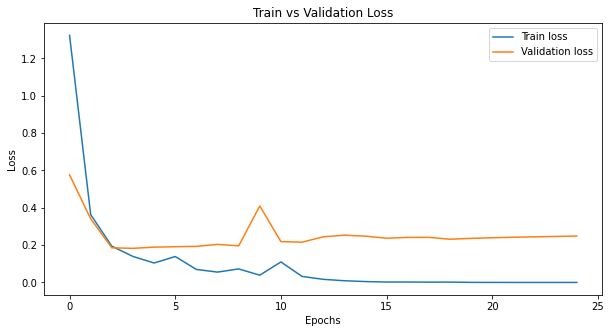

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 5))
plt.plot(tr_loss_l, label="Train loss")
plt.plot(val_loss_l, label="Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Train vs Validation Loss")
plt.legend(loc='upper right')
plt.show()

In [6]:
batch_size, learning_rate, epochs, rounds = 10, 1e-1, 20, 10
val_accuracy_list = predict_sc_accuracy(model, batch_size, learning_rate, epochs, rounds)


Round: 1/10, Val Accuracy: 97.899994% 979/1000

Round: 2/10, Val Accuracy: 97.899994% 979/1000

Round: 3/10, Val Accuracy: 98.199997% 982/1000

Round: 4/10, Val Accuracy: 97.000000% 970/1000

Round: 5/10, Val Accuracy: 98.400002% 984/1000

Round: 6/10, Val Accuracy: 98.099998% 981/1000

Round: 7/10, Val Accuracy: 98.099998% 981/1000

Round: 8/10, Val Accuracy: 98.199997% 982/1000

Round: 9/10, Val Accuracy: 98.500000% 985/1000

Round: 10/10, Val Accuracy: 98.000000% 980/1000


No handles with labels found to put in legend.


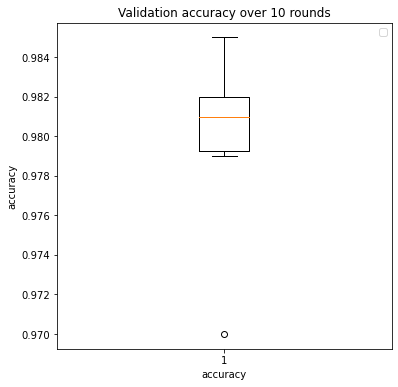

In [7]:
fig = plt.figure(figsize=(6, 6))
plt.boxplot([val_accuracy_list])
plt.xlabel('accuracy')
plt.ylabel('accuracy')
plt.title(f'Validation accuracy over {rounds} rounds')
plt.legend(loc='upper right')
plt.show()